Verificando informações referentes aos dados de nascimentos dos animais por linhagem

4) Pergunta: Qual a Mediana do período do Acasalamento ao Nascimento?

In [89]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns
# import numpy as np
from statsmodels.tsa.arima_model import ARIMA

#Paramentros para os gráficos
plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 18 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 18 #tamanho da fonte


In [90]:
#Filtros para trabalhar com os dados da minha dataframe original

nume_ani = pd.read_csv('../../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
nume_ani = nume_ani[(nume_ani['num_ani'] < 200) 
                    & (nume_ani['util'] == 'nasc')
                    & (nume_ani['ling'] != 'Test')
                    & (nume_ani['ling'] != 'AG129')]
 #descarte[(descarte['obs_desc'] != 'AAA')
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    nume_ani[d] = pd.to_datetime(nume_ani[d], unit = 's')
nume_ani.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [91]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

nume_ani['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

nume_ani['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

nume_ani['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

nume_ani['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

nume_ani['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

nume_ani['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

nume_ani['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

nume_ani['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

nume_ani['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)

In [92]:
nume_ani['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 A     48
Swiss-1 E     47
Swiss-1 C     38
Swiss-1 B     36
Swiss-1 D     33
Swiss-2 C     27
Swiss-2 B     24
DBA/1J        24
Swiss-2 D     21
Swiss-2 A     21
Swiss-2 E     21
Name: ling, dtype: int64

In [93]:
#Agrupando por linhagem
l = nume_ani.groupby('ling')
l.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,905,99234,99234,99234,99234,99234,99234,155,228,905,81345,72034,99234,99234
Balb/c,4289,331668,331668,331668,331668,331668,331668,498,802,4289,256073,236898,331668,331668
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,4001,306360,306360,306360,306360,306360,306360,462,779,4001,258681,231501,306360,306360
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1612,166500,166500,166500,166500,166500,166500,252,422,1612,134025,136660,166500,166500
Swiss-1 A,515,31968,31968,31968,31968,31968,31968,48,62,515,27992,28657,31968,31968
Swiss-1 B,381,23976,23976,23976,23976,23976,23976,36,49,381,20001,20000,23976,23976
Swiss-1 C,462,25308,25308,25308,25308,25308,25308,38,55,462,20006,21999,25308,25308


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

RETIRANDO OS OUTLIERS DOS DADOS

Em outras analises foram observados valores discrepantes, ao trabalhar com novas análises, utilizei a DataFrame a partir dos dados sem esses valores

In [94]:
#Criando uma nova Dataframe, filtrando os valores discrepantes
q1 = nume_ani['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out = nume_ani[(nume_ani['num_ani'] > (q1 - 1.5 * iqr)) & (nume_ani['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss-1 E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss-1 E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
122,2014-09-23 18:13:24,Tania,Swiss-1 D,10,AAA,1970-01-01 00:11:06,58,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:26:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA
123,2014-09-23 18:13:24,Tania,Swiss-1 B,10,AAA,1970-01-01 00:11:06,60,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:38:13,2014-09-23 18:13:24,10,2014-10-14 18:13:24,666,666,666,666,AAA,AAA


In [95]:
#conferindo a mediana dos dados sem outliers
test_g= sem_out.groupby('ling')
test_g.sum()

,num_ani,id_solic,total_time,doses,data_solic,data_forn,data_fim,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,,,,
129/SV-E,886,98568,98568,98568,98568,98568,98568,154,225,886,80679,71368,98568,98568
Balb/c,3452,307026,307026,307026,307026,307026,307026,461,734,3452,234084,219538,307026,307026
C3H,603,67932,67932,67932,67932,67932,67932,102,119,603,54003,53996,67932,67932
C57BL/6,3553,295038,295038,295038,295038,295038,295038,445,743,3553,249343,223490,295038,295038
DBA/1J,230,15984,15984,15984,15984,15984,15984,24,47,230,15984,15984,15984,15984
S129KO,1531,164502,164502,164502,164502,164502,164502,249,416,1531,132689,134662,164502,164502
Swiss-1 A,466,30636,30636,30636,30636,30636,30636,46,56,466,26660,27325,30636,30636
Swiss-1 B,353,23310,23310,23310,23310,23310,23310,35,46,353,19335,19334,23310,23310
Swiss-1 C,323,22644,22644,22644,22644,22644,22644,34,46,323,18005,19335,22644,22644


++++++++++++++++++++++++++++++++++++++ ACASALAMENTO/NASCIMENTO +++++++++++++++++++++++++++

In [96]:
#Criada um DataFrame com o período entre acasalamento e nascimento - com outliers (as datas day_nasc_acas)
nume_ani_nasc_acas = pd.DataFrame()
nume_ani_nasc_acas = sem_out[['date_acas', 'date_nasc_acas', 'num_nasc', 'ling']]
nume_ani_nasc_acas['day_nasc_acas'] = list(map(lambda day_nasc_acas: sem_out['date_nasc_acas'] - sem_out['date_acas'], sem_out))[0]
nume_ani_nasc_acas.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date_acas,date_nasc_acas,num_nasc,ling,day_nasc_acas
id,,,,,
116,2014-08-26 17:06:07,2014-09-23 17:40:33,5,Swiss-1 E,28 days 00:34:26
117,2014-08-26 17:14:19,2014-09-23 17:40:33,10,Swiss-1 E,28 days 00:26:14
119,2014-08-26 17:06:07,2014-09-23 17:40:47,10,Swiss-1 E,28 days 00:34:40
122,2014-08-26 17:26:13,2014-09-23 18:13:24,10,Swiss-1 D,28 days 00:47:11
123,2014-08-26 17:38:13,2014-09-23 18:13:24,10,Swiss-1 B,28 days 00:35:11


In [97]:
#retirando os horários da coluna 'day_nasc_acas'
p1 = lambda s: int(str(s).split(' ')[0])                    #Criada uma função única para transforar a serie em string, cortar por espaços na [0]
p2 = nume_ani_nasc_acas['day_nasc_acas']                    #Chamando essa coluna na minha dataframe
l = list(map(p1, p2))                                       #Guardando essas informações numa lista/map para iteração e percorrer a serie de uma só vez
nume_ani_nasc_acas['day_nasc_acas_day'] = l                 #Criando nova coluna com apenas o valor dos dias que vai receber o que tenho na minha lista          
nume_ani_nasc_acas.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date_acas,date_nasc_acas,num_nasc,ling,day_nasc_acas,day_nasc_acas_day
id,,,,,,
116,2014-08-26 17:06:07,2014-09-23 17:40:33,5,Swiss-1 E,28 days 00:34:26,28
117,2014-08-26 17:14:19,2014-09-23 17:40:33,10,Swiss-1 E,28 days 00:26:14,28
119,2014-08-26 17:06:07,2014-09-23 17:40:47,10,Swiss-1 E,28 days 00:34:40,28
122,2014-08-26 17:26:13,2014-09-23 18:13:24,10,Swiss-1 D,28 days 00:47:11,28
123,2014-08-26 17:38:13,2014-09-23 18:13:24,10,Swiss-1 B,28 days 00:35:11,28


In [98]:
mediana_acasa = nume_ani_nasc_acas.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana_acasal = round(mediana_acasa['day_nasc_acas_day'].median(),2)    #Somando o numero total de animas e pedidndo a mediana
plot_mediana_a = round(mediana_acasal.median(),2)
plot_mediana_a

35.0

In [99]:
media_acasa = nume_ani_nasc_acas.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media_acasal = round(media_acasa['day_nasc_acas_day'].median(),2)    #Somando o numero total de animas e pedidndo a mediana
plot_media_a = round(media_acasal.mean(),2)
plot_media_a

35.38

In [100]:
# plt.figure(figsize=(15,10))
# plt.title('Média do período de acasalamento ao nascimento por linhagem')

# plot = nume_ani_nasc_acas.groupby('ling')
# plot['day_nasc_acas_day'].mean().sort_values(ascending=True).plot(
# kind='barh'
# )
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #plotando faixas de média e mediana


# plt.plot( #função para plotar o gráfico
#     [plot_media_a, plot_media_a], #faixa que marca a média
#     [len(nume_ani_nasc_acas.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [plot_mediana_a, plot_mediana_a], #faixa que marca a mediana
#     [len(nume_ani_nasc_acas.index), 0], 
#     c='green' #cor verde da faixa
# )

In [101]:
# #Boxplot com os outliers dos intervalos do periodo de acasalamento e nascimento ('day_nasc_acas_day')
# plt.figure(figsize=(15,15))
# plt.title('Período entre acasalamente e nascimento')
# sns.boxplot(
    
#     y='ling',
#     x='day_nasc_acas_day',
#     data=nume_ani_nasc_acas
# )

Foram observados valores discrepantes nos dados a partir do período analisado, sendo necessário retirar os outliers

In [102]:
#Retirando os outliers da coluna day_nasc_acas_day para verificar o período de acasalamento ao nascimento.
q1 = nume_ani_nasc_acas['day_nasc_acas_day'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = nume_ani_nasc_acas['day_nasc_acas_day'].quantile(0.75)
iqr = q3 - q1

sem_out_acas = nume_ani_nasc_acas[(nume_ani_nasc_acas['day_nasc_acas_day'] > (q1 - 1.5 * iqr)) & (nume_ani_nasc_acas['day_nasc_acas_day'] < (q3 + 1.5 * iqr))]#dataframe
sem_out_acas.head()

,date_acas,date_nasc_acas,num_nasc,ling,day_nasc_acas,day_nasc_acas_day
id,,,,,,
116,2014-08-26 17:06:07,2014-09-23 17:40:33,5,Swiss-1 E,28 days 00:34:26,28
117,2014-08-26 17:14:19,2014-09-23 17:40:33,10,Swiss-1 E,28 days 00:26:14,28
119,2014-08-26 17:06:07,2014-09-23 17:40:47,10,Swiss-1 E,28 days 00:34:40,28
122,2014-08-26 17:26:13,2014-09-23 18:13:24,10,Swiss-1 D,28 days 00:47:11,28
123,2014-08-26 17:38:13,2014-09-23 18:13:24,10,Swiss-1 B,28 days 00:35:11,28


In [112]:
ling_het = ['Swiss-1 A','Swiss-1 B','Swiss-1 C','Swiss-1 D','Swiss-1 E',
           'Swiss-2 A','Swiss-2 B','Swiss-2 C','Swiss-2 D','Swiss-2 E']  

g_het = sem_out_acas[sem_out_acas['ling'].isin(ling_het)].groupby('ling')
linhagens_het = g_het.mean()
linhagens_het.median()

num_nasc             10.088312
day_nasc_acas_day    36.511029
dtype: float64

In [113]:
ling_iso = ['Balb/c','S129KO','C57BL/6','129/SV-E','C3H','DBA/1J','AG129']

g_iso = sem_out_acas[sem_out_acas['ling'].isin(ling_iso)].groupby('ling')
linhagens_iso = g_iso.mean()
linhagens_iso.median()

num_nasc              6.865399
day_nasc_acas_day    48.801299
dtype: float64

In [103]:
# #Boxplot após a retirada dos outliers da coluna 'day_nasc_acas_day'
# plt.figure(figsize=(15,15))
# plt.title('Período entre acasalamente e nascimento')
# sns.boxplot(
    
#     y='ling',
#     x='day_nasc_acas_day',
#     data=sem_out_acas
# )

In [104]:
mediana_acas = sem_out_acas.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
mediana_sem_out = round(mediana_acas['day_nasc_acas_day'].median(),2)    #Somando o numero total de animas e pedidndo a mediana
plot_mediana = round(mediana_sem_out.median(),2)
plot_mediana

35.0

In [105]:
media_acas = sem_out_acas.groupby('ling')                      #Agrupando por linhagem e guardando em uma variável
media_sem_out = round(media_acas['day_nasc_acas_day'].median(),2)    #Somando o numero total de animas e pedidndo a mediana
plot_media = round(media_sem_out.mean(),2)
plot_media

34.88

In [106]:
sns_plot_aca = sem_out_acas.groupby('ling').median().sort_values(by='day_nasc_acas_day',ascending=False).reset_index()


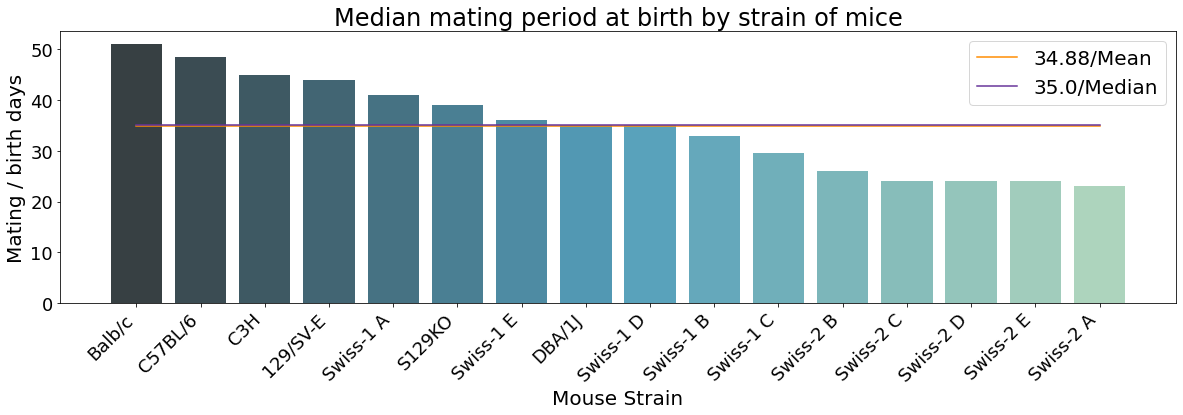

In [108]:
plt.figure(figsize=(20,5))
plt.title('Median mating period at birth by strain of mice')

sns.barplot(x='ling',
    y='day_nasc_acas_day', palette="GnBu_d",
    data=sns_plot_aca).set_xticklabels(
                            rotation=45,
                            horizontalalignment='right',
    labels=sns_plot_aca['ling']
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_media, plot_media], #faixa que marca a média 
    c='darkorange',
    label= '34.88/Mean' 
#     linestyle='--'
)
plt.plot( #função para plotar o gráfico
    [0,15],
    [plot_mediana, plot_mediana], #faixa que marca a mediana 
    c='rebeccapurple',
    label= '35.0/Median'
#     linestyle='--'
)

plt.legend(loc='upper right')
plt.xlabel('Mouse Strain') #definindo nome do eixo X
plt.ylabel('Mating / birth days') #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Salvando os gráficos
plt.savefig(
    fname="../../resultados/numero_media_acas_nasc_fig4-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=300, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [64]:
# plt.figure(figsize=(10,5))
# plt.title('Median mating period at birth by strain of mice',**csfont)

# plot = sem_out_acas.groupby('ling')
# plot['day_nasc_acas_day'].median().sort_values(ascending=True).plot(
# kind='barh'
# )
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #plotando faixas de média e mediana


# plt.plot( #função para plotar o gráfico
#     [plot_media, plot_media], #faixa que marca a média
#     [len(sem_out_acas.index), 0], 
#     c='red' #cor vermelha da faixa
# )
# plt.plot( #função para plotar o gráfico
#     [plot_mediana, plot_mediana], #faixa que marca a mediana
#     [len(sem_out_acas.index), 0], 
#     c='green' #cor verde da faixa
# )
# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# #Editando legendas do gráfico

# plt.legend([str(plot_media) + ' média ani/ling', str(plot_mediana) + ' mediana ani/ling'])

# plt.xlabel('Mating / birth days',**csfont) #definindo nome do eixo X
# plt.ylabel('Mouse Strain',**csfont) #definindo nome do eixo Y
# #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# # #Salvando os gráficos
# # plt.savefig(
# #     fname="../../resultados/periodo_acas_nasc_fig4-ARTIGO.png", #pasta e nome do arquivo onde vai ser salvo
# #     bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
# #     dpi=300, #numero de pixels da imagem?
# #     transparent=True #deixar o gráfico transparente
# # )